In [100]:
import sys
if 'src' not in sys.path:
    sys.path.append('src')
from SimpleEC import *
from operators import *
from sklearn.metrics import mean_absolute_error

In [101]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.knr import KNNR, wsplit

Datasets interesantes del S&P 500 y dowjons 

http://lib.stat.cmu.edu/datasets/djdc0093

http://lib.stat.cmu.edu/datasets/spdc2693

http://lib.stat.cmu.edu/datasets/

In [102]:
data = pd.read_csv('assets/VOO-dataset.csv')


<AxesSubplot:>

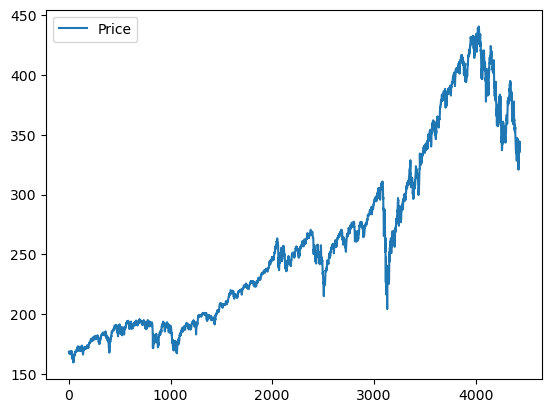

In [103]:
data.plot()

In [104]:
X,Y=wsplit(data.Price,10,1)
x=X[:-48]
y=Y[:-48]
xv=X[-48:-24]
yv=Y[-48:-24]
xt=X[-24:]
yt=Y[-24:]

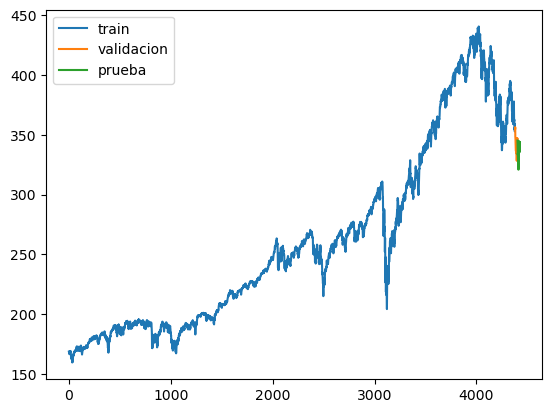

In [105]:
n=len(y)
nv=len(yv)
nt=len(yt)
plt.plot(range(0,n),y, label='train')
plt.plot(range(n,n+nv),yv, label='validacion')
plt.plot(range(n+nv,n+nv+nt),yt, label='prueba')
plt.legend(loc=0)

In [106]:
# reg = Ridge()
reg = DecisionTreeRegressor(criterion='poisson', max_depth=20)
reg.fit(x,y)

DecisionTreeRegressor(criterion='poisson', max_depth=20)

In [107]:
yp=reg.predict(xv)
mean_absolute_error(yv,yp)

4.036668083333329

In [108]:
reg=DecisionTreeRegressor(criterion='poisson', max_depth=10)
reg.fit(x,y)

DecisionTreeRegressor(criterion='poisson', max_depth=10)

3.8703708845982185


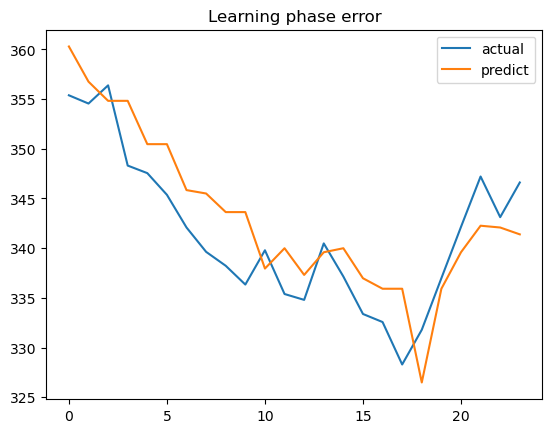

In [109]:
yp = reg.predict(xv)
print(mean_absolute_error(yv, yp))
plt.plot(yv, label='actual')
plt.plot(yp, label='predict')
plt.title("Learning phase error")
plt.legend()


4.276353457986128


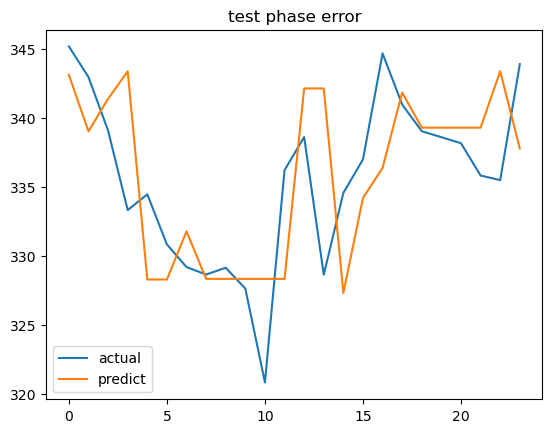

In [110]:
breg = reg.fit(X[:-24], Y[:-24])
mean_absolute_error(yt, reg.predict(xt))
yp1 = reg.predict(xt)
print(mean_absolute_error(yt, yp1))
plt.plot(yt, label='actual')
plt.plot(yp1, label='predict')
plt.title("test phase error")
plt.legend()
